#### Question 18

In [85]:
library(igraph)
library(entropy)

egoNodes <- dir("gplus",pattern = "circles")
print(paste("There are ", length(egoNodes), " personal networks in total."))

count = 0
for (i in egoNodes){
    filename <- paste('./gplus/', i, sep = "")
    circles <- file(filename, 'r')
    lines <- readLines(circles)
    if (length(lines) > 2){
        count = count + 1
    }    
}
print(paste("There are ", count, " personal networks with more than 2 circles."))


[1] "There are  132  personal networks in total."
[1] "There are  57  personal networks with more than 2 circles."


#### Question 19

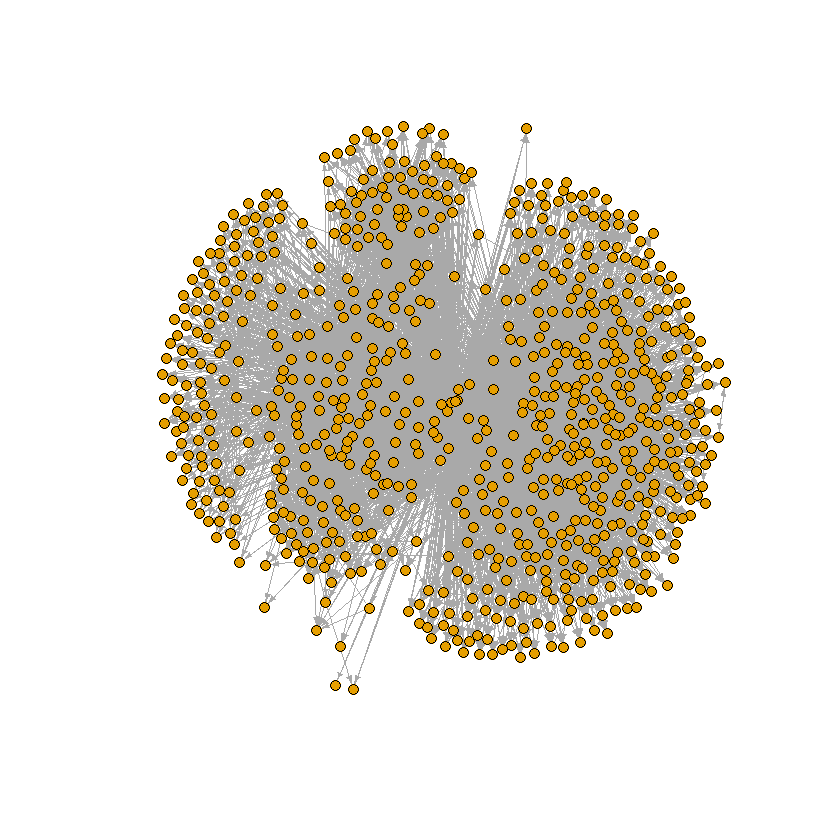

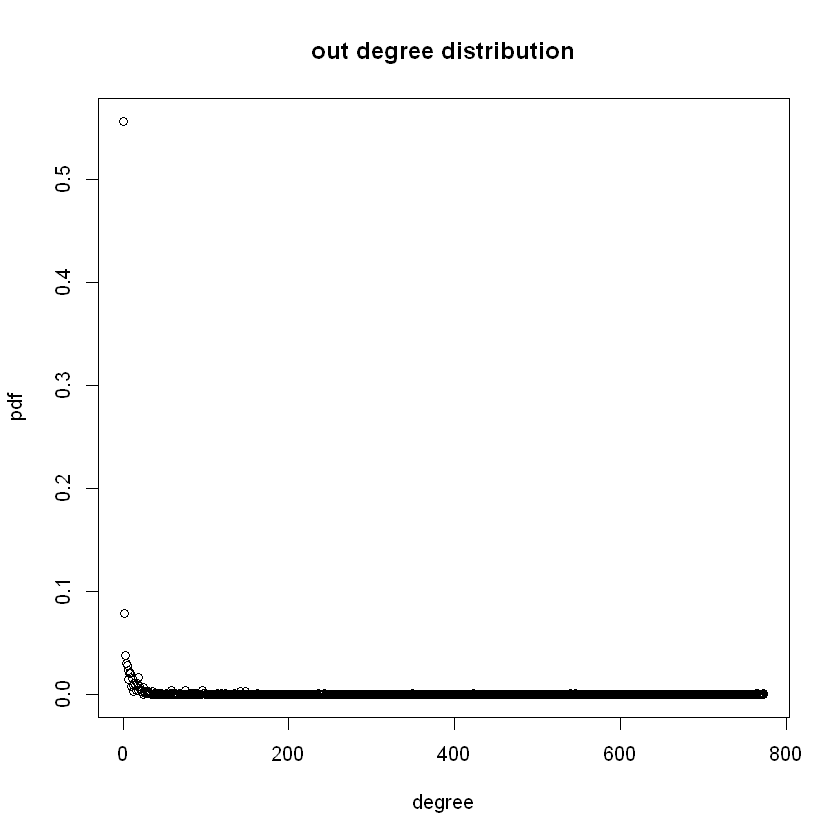

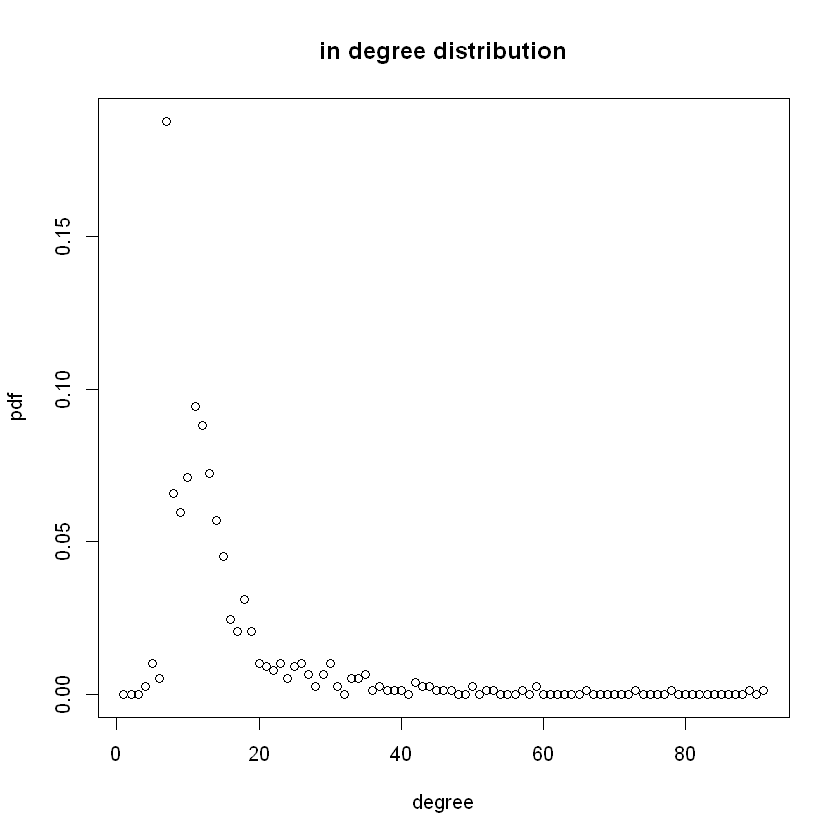

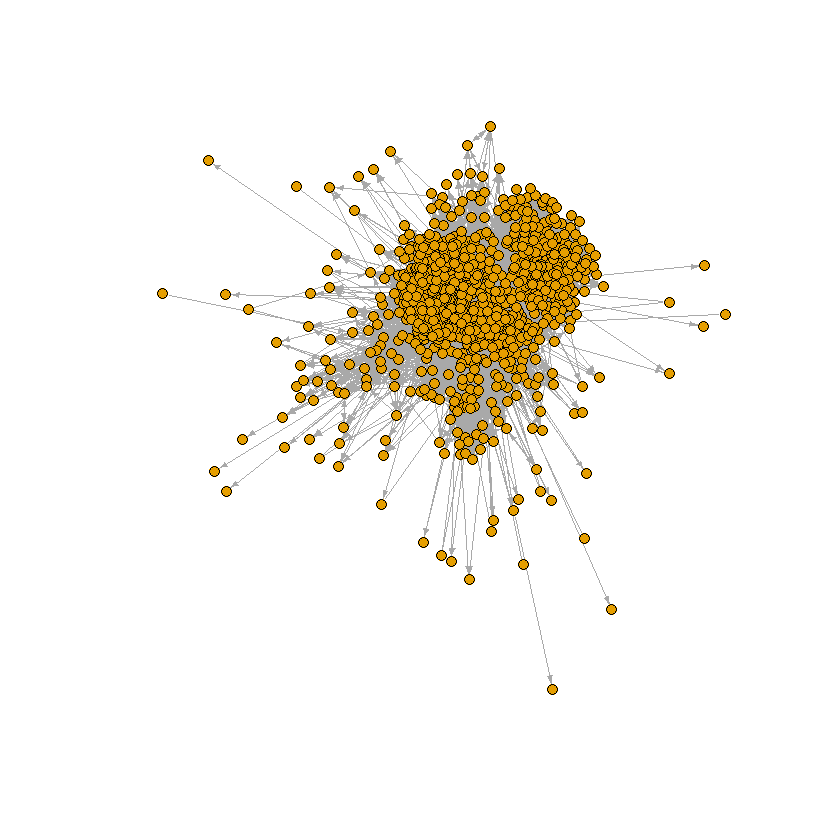

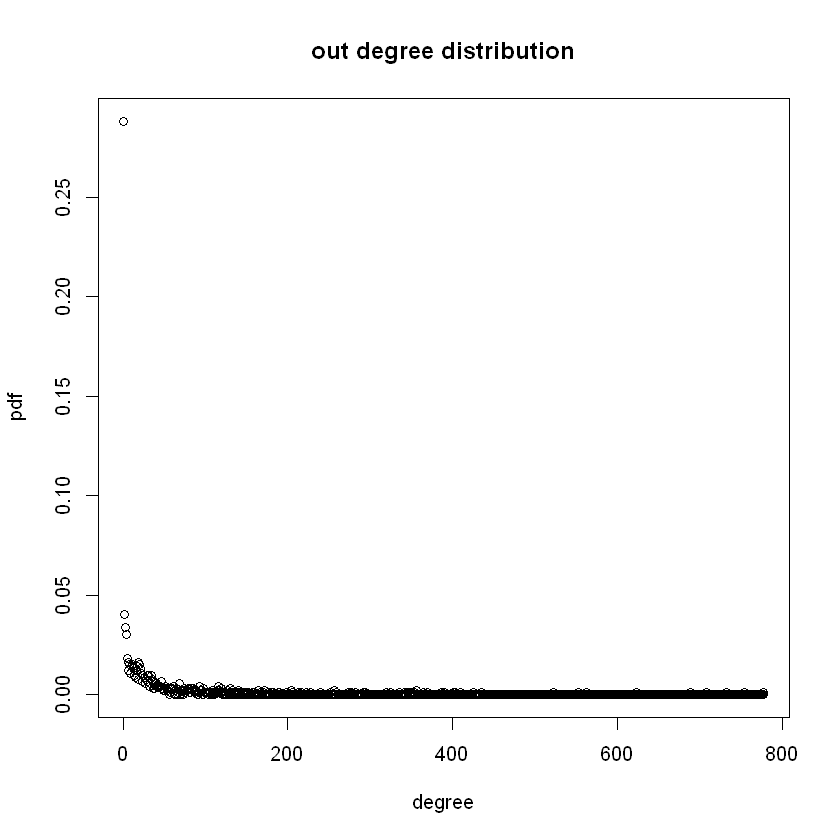

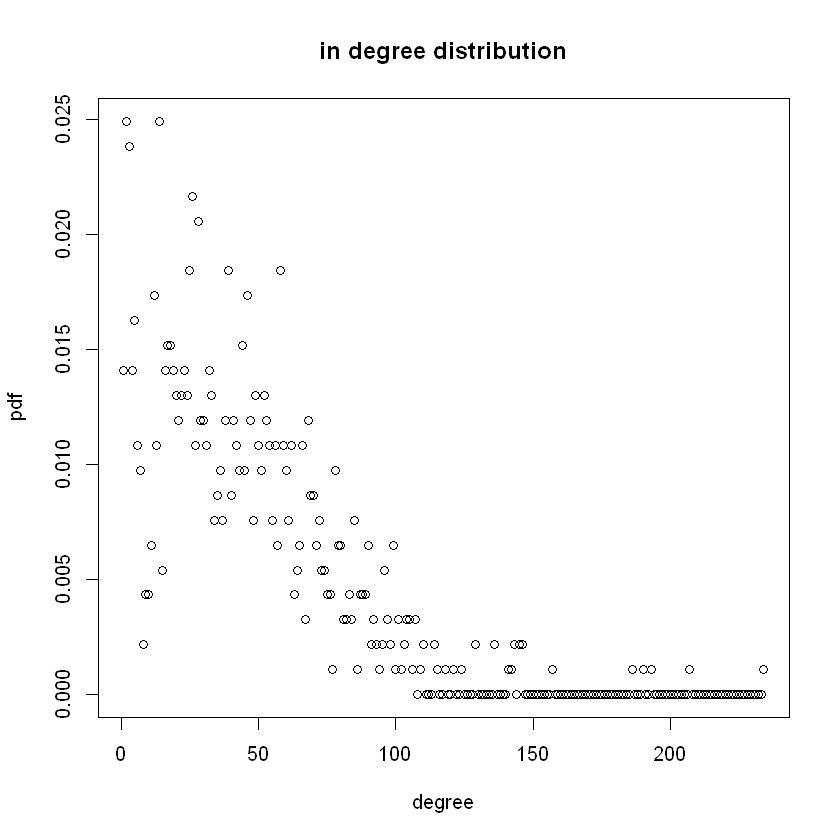

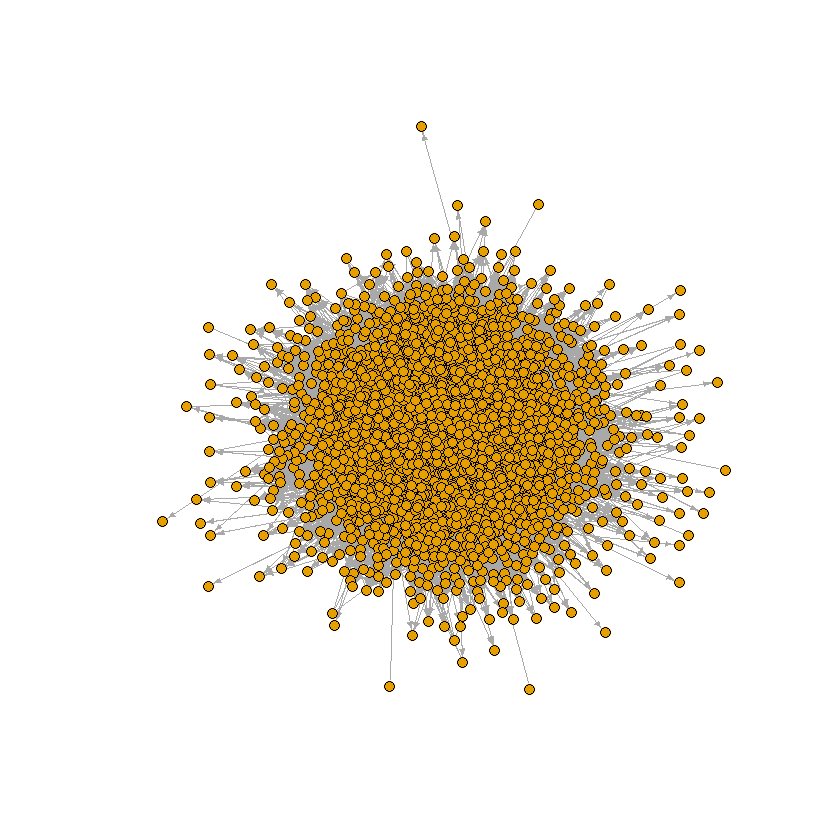

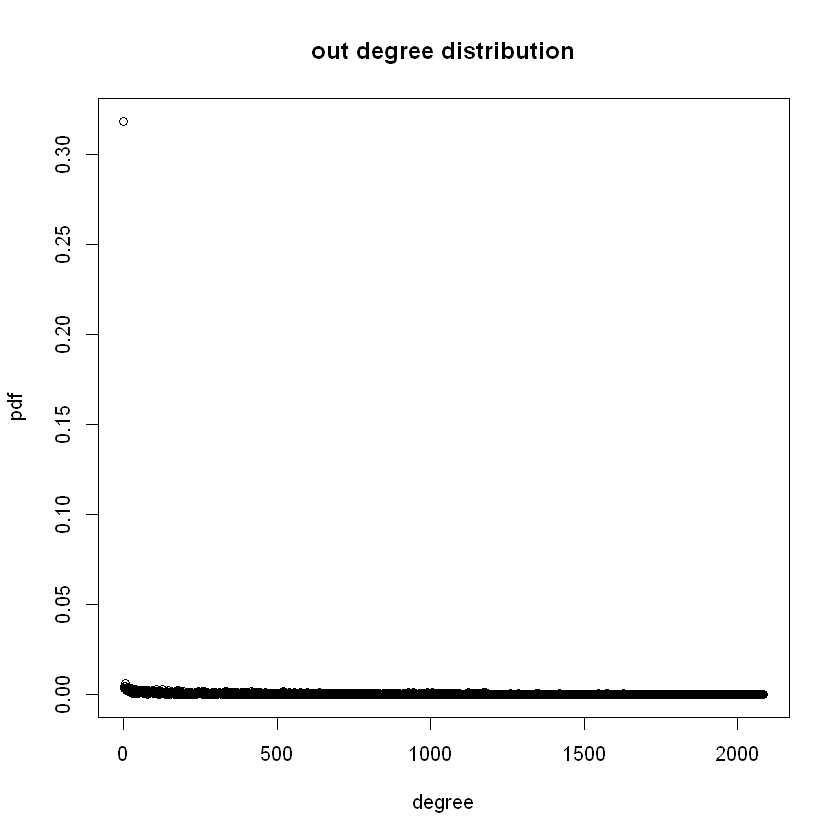

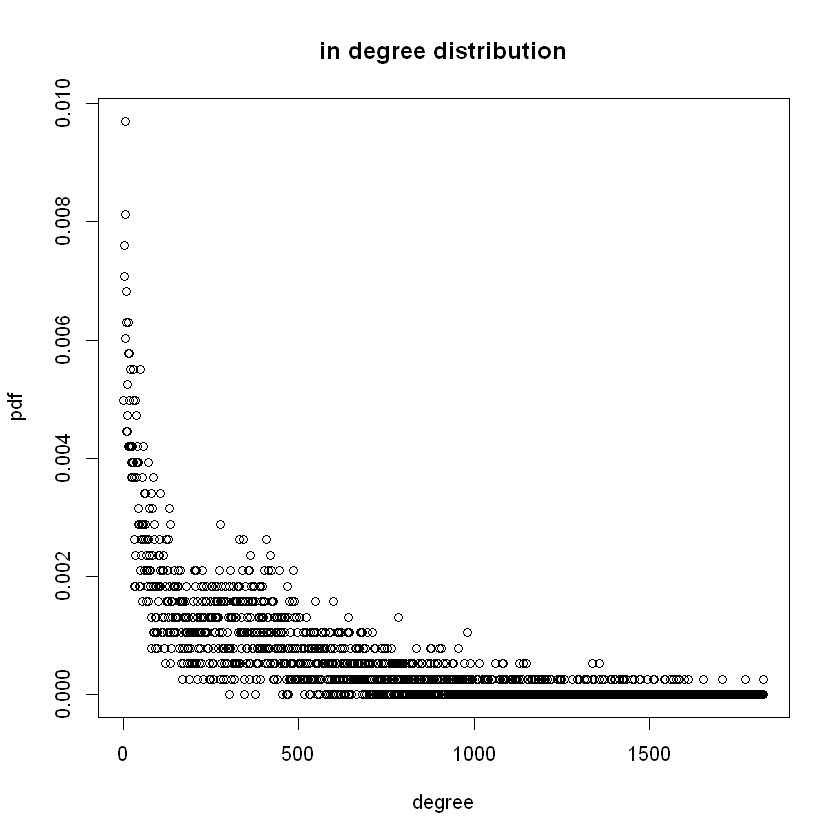

In [193]:
node2plot <- c("109327480479767108490", 
               "115625564993990145546", 
               "101373961279443806744")

create_graph = function(id, plot = FALSE){
    file2plot <- paste("gplus/", id, sep="")
    edge_file <- paste(file2plot, ".edges", sep="")
    g = read_graph(edge_file, format = 'ncol', directed = TRUE)
    V(g)$vid<-V(g)
    E(g)$eid<-E(g)
    plot(g, vertex.size=4,  vertex.label=NA, edge.arrow.size=.3)
    
    if (plot){
        plot(degree.distribution(g,mode="out"), main="out degree distribution",xlab="degree",ylab="pdf")
        plot(degree.distribution(g,mode="in"), main="in degree distribution",xlab="degree",ylab="pdf")
    }
    return(g)
}

g1 = create_graph(node2plot[1], T)
g2 = create_graph(node2plot[2], T)
g3 = create_graph(node2plot[3], T)

#### Question 20

[1] "Modularity score is  0.279819399118423"
[1] "Community  1  has size of  291"
[1] "Community  2  has size of  393"
[1] "Community  3  has size of  76"
[1] "Community  4  has size of  13"


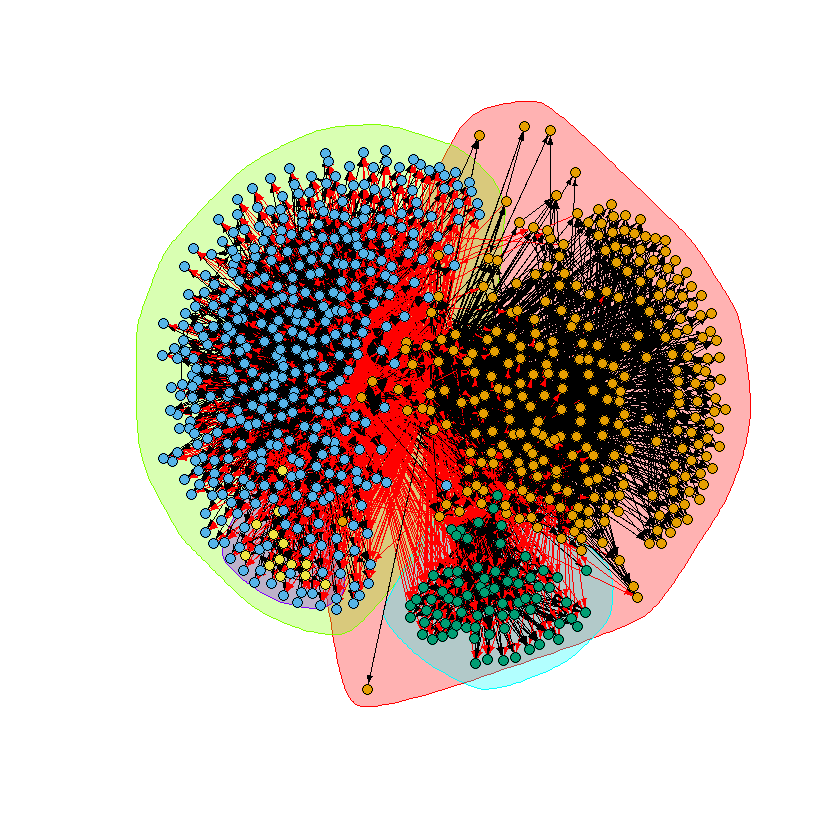

In [87]:
walk1 = walktrap.community(g1)
print(paste("Modularity score is ", modularity(walk1)))

plot(walk1 , g1, vertex.label=NA, vertex.size=4, edge.arrow.size=.3)

com_size = sizes(walk1)
for (i in 1:length(walk1)){
    print(paste("Community ", i," has size of ", com_size[i]))
}

[1] "Modularity score is  0.323086827993393"
[1] "Community  1  has size of  40"
[1] "Community  2  has size of  220"
[1] "Community  3  has size of  375"
[1] "Community  4  has size of  3"
[1] "Community  5  has size of  28"
[1] "Community  6  has size of  235"
[1] "Community  7  has size of  2"
[1] "Community  8  has size of  3"
[1] "Community  9  has size of  1"
[1] "Community  10  has size of  1"
[1] "Community  11  has size of  1"
[1] "Community  12  has size of  1"
[1] "Community  13  has size of  1"
[1] "Community  14  has size of  1"
[1] "Community  15  has size of  1"
[1] "Community  16  has size of  1"
[1] "Community  17  has size of  1"
[1] "Community  18  has size of  1"
[1] "Community  19  has size of  1"
[1] "Community  20  has size of  1"
[1] "Community  21  has size of  1"
[1] "Community  22  has size of  1"
[1] "Community  23  has size of  1"
[1] "Community  24  has size of  1"
[1] "Community  25  has size of  1"


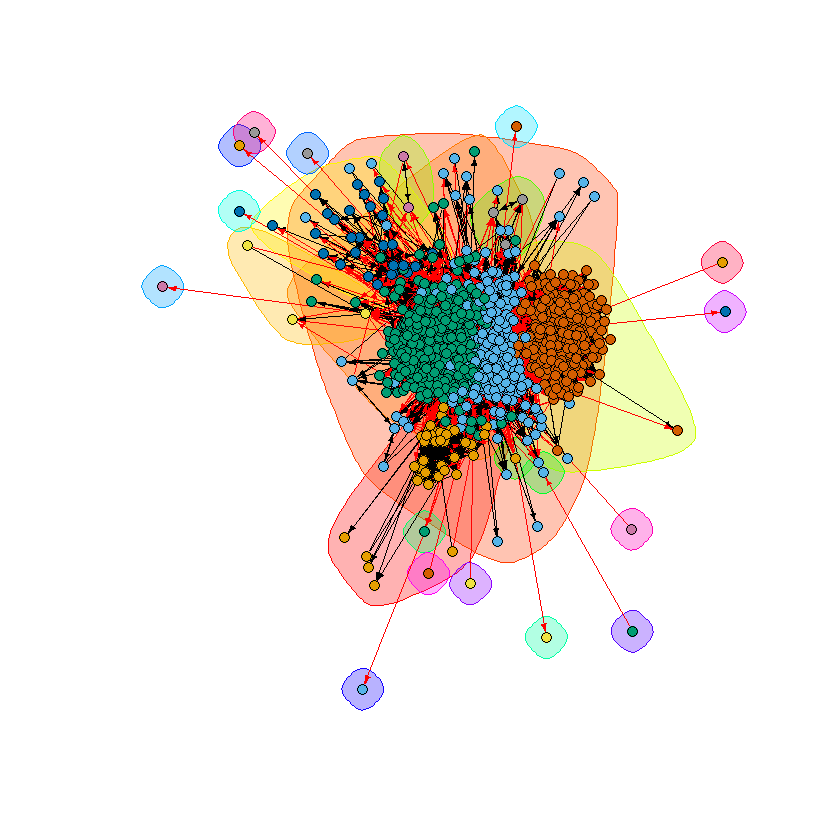

In [88]:
walk2 = walktrap.community(g2)
print(paste("Modularity score is ", modularity(walk2)))

plot(walk2 , g2, vertex.label=NA, vertex.size=4, edge.arrow.size=.3)

com_size = sizes(walk2)
for (i in 1:length(walk2)){
    print(paste("Community ", i," has size of ", com_size[i]))
}

[1] "Modularity score is  0.195091187953949"
[1] "Community  1  has size of  2895"
[1] "Community  2  has size of  892"
[1] "Community  3  has size of  1"
[1] "Community  4  has size of  1"
[1] "Community  5  has size of  1"
[1] "Community  6  has size of  1"
[1] "Community  7  has size of  1"
[1] "Community  8  has size of  1"
[1] "Community  9  has size of  1"
[1] "Community  10  has size of  1"
[1] "Community  11  has size of  1"
[1] "Community  12  has size of  1"
[1] "Community  13  has size of  1"
[1] "Community  14  has size of  1"
[1] "Community  15  has size of  1"
[1] "Community  16  has size of  1"
[1] "Community  17  has size of  1"
[1] "Community  18  has size of  1"
[1] "Community  19  has size of  1"
[1] "Community  20  has size of  1"
[1] "Community  21  has size of  1"
[1] "Community  22  has size of  1"
[1] "Community  23  has size of  1"
[1] "Community  24  has size of  1"
[1] "Community  25  has size of  1"
[1] "Community  26  has size of  1"
[1] "Community  27  has

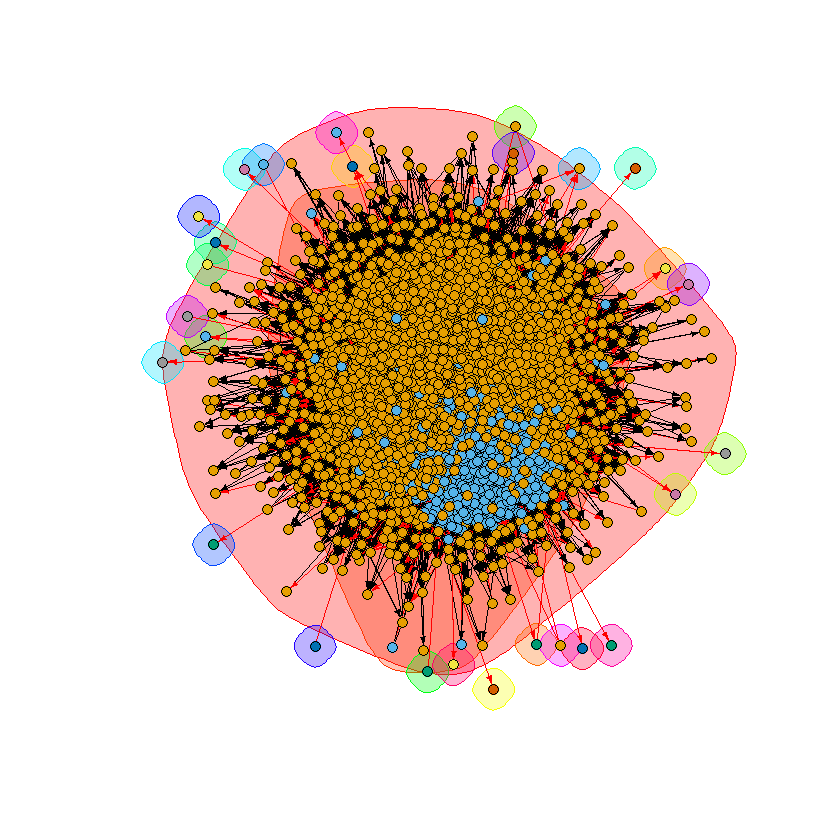

In [89]:
walk3 = walktrap.community(g3)
print(paste("Modularity score is ", modularity(walk3)))

plot(walk3 , g3, vertex.label=NA, vertex.size=4, edge.arrow.size=.3)

com_size = sizes(walk3)
for (i in 1:length(walk3)){
    print(paste("Community ", i," has size of ", com_size[i]))
}

In [199]:
s = 0
for (i in 1:length(circ3)){
    s  = s + length(circ3[[i]])
}
s
length(unique(unlist(circ3)))

[1] 1346

[1] 521

#### Question 21

#### Question 22

In [90]:
get_circles <- function(id){
    file2plot <- paste("gplus/", id, sep="")
    circle_filename <- paste(file2plot, ".circles", sep="")
    circle_file = file(circle_filename , open="r")
    circles_ = readLines(circle_file)
    circles = list()
    for (i in 1:length(circles_)) {
        circle_nodes = strsplit(circles_[i], "\t")
        circles = c(circles, list(circle_nodes[[1]][-1]))
    }
    return(circles)
}

circ1 <- get_circles(node2plot[1])
circ2 <- get_circles(node2plot[2])
circ3 <- get_circles(node2plot[3])


In [91]:
hc <- function(circ){
    N = length(unique(unlist(circ)))
    sum = 0
    for (l in 1:length(circ)){
        ai = length(circ[[l]])
        sum = sum - ai*1.0/N*log10(ai*1.0/N)
    }
    return(sum)
}

hc1 <- hc(circ1)
hc2 <- hc(circ2)
hc3 <- hc(circ3)
print(hc1)
print(hc2)
print(hc3)

[1] 0.4563477
[1] 3.676366
[1] 0.166908


In [143]:
comm_member <- function(community){
    mem = list()
    for (i in 1:length(community)){
        mem = c(mem, list(
            names(membership(community)[(membership(community))==i])))
    }
    return(mem)
}
                                     
comm1 = comm_member(walk1)
comm2 = comm_member(walk2)
comm3 = comm_member(walk3)

In [159]:
hk <- function(community, circ){
    circ_people = unique(unlist(circ))
    N = length(circ_people)
    s = 0
    for (l in 1:length(community)){
        match_result = match(community[[l]], circ_people)
        bi = sum(!is.na(match_result))
        if (bi != 0){
            s = s - bi*1.0/N*log10(bi*1.0/N)
        }
    }
    return(s)
}

hk1 <- hk(comm1, circ1)
hk2 <- hk(comm2, circ2)
hk3 <- hk(comm3, circ3)
print(hk1)
print(hk2)
print(hk3)

[1] 0.4373307
[1] 0.4591146
[1] 0.2323463


In [161]:
hck <- function(community, circ){
    circ_people = unique(unlist(circ))
    N = length(circ_people)
    s = 0
    for (l1 in 1:length(community)){
        for (l2 in 1:length(circ)){
            match_result1 = match(community[[l1]], circ[[l2]])
            cji = sum(!is.na(match_result1))
            match_result2 = match(community[[l1]], circ_people)
            bj = sum(!is.na(match_result2))
            if (cji != 0 && bj != 0){
                s = s - cji*1.0/N*log10(cji*1.0/bj)
            }
        }
    }
    return(s)
}

hck1 <- hck(comm1, circ1)
hck2 <- hck(comm2, circ2)
hck3 <- hck(comm3, circ3)
print(hck1)
print(hck2)
print(hck3)

[1] 0.06206141
[1] 2.04794
[1] 0.1666011


In [165]:
hkc <- function(community, circ){
    circ_people = unique(unlist(circ))
    N = length(circ_people)
    s = 0
    for (l1 in 1:length(community)){
        for (l2 in 1:length(circ)){
            match_result = match(community[[l1]], circ[[l2]])
            cji = sum(!is.na(match_result))
            ai = length(circ[[l2]])
            if (cji != 0 && ai != 0){
                s = s - cji*1.0/N*log10(cji*1.0/ai)
            }
        }
    }
    return(s)
}

hkc1 <- hkc(comm1, circ1)
hkc2 <- hkc(comm2, circ2)
hkc3 <- hkc(comm3, circ3)
print(hkc1)
print(hkc2)
print(hkc3)

[1] 0.2861488
[1] 2.008956
[1] 0.6062526


In [166]:
h1 = 1-hck1/hc1
c1 = 1-hkc1/hk1
h2 = 1-hck2/hc2
c2 = 1-hkc2/hk2
h3 = 1-hck3/hc3
c3 = 1-hkc3/hk3
print(h1)
print(c1)
print(h2)
print(c2)
print(h3)
print(c3)

[1] 0.8640041
[1] 0.3456923
[1] 0.4429445
[1] -3.375718
[1] 0.001839249
[1] -1.609263
